In [1]:
import pandas as pd
import numpy as np
import rioxarray as rxr
import xarray as xr
from pathlib import Path 

import time


import netCDF4



f2 = '/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/Not_collocated_T_AOD_and_CER_with_wind_and_FRP_all_cases_all_JJA_agg_for_Sara.nc'





default_varl = ['Cloud_Water_Path_Liquid_Mean',
 'Cloud_Water_Path_Liquid_Mean_Uncertainty',
 'Cloud_Water_Path_Liquid_Standard_Deviation',
 'Cloud_Water_Path_Liquid_Maximum',
 'Cloud_Water_Path_Liquid_Minimum',
 'Cloud_Top_Temperature_Day_Maximum',
 'Cloud_Top_Temperature_Day_Mean',
 'Cloud_Top_Temperature_Day_Minimum',
 'Cloud_Top_Pressure_Day_Mean',
 'Cloud_Top_Pressure_Day_Maximum',
 'Cloud_Top_Pressure_Day_Minimum',
 'Cloud_Top_Height_Day_Mean',
 'Cloud_Top_Height_Day_Maximum',
 'Cloud_Top_Height_Day_Minimum',
 'Cloud_Fraction_Day_Mean',
 'Cloud_Fraction_Day_Maximum',
 'Cloud_Fraction_Day_Minimum',
 'Cloud_Optical_Thickness_Liquid_Maximum',
 'Cloud_Optical_Thickness_Liquid_Mean',
 'Cloud_Optical_Thickness_Liquid_Mean_Uncertainty',
 'Cloud_Optical_Thickness_Liquid_Minimum',
 'Cloud_Optical_Thickness_Liquid_Standard_Deviation',
 'Cloud_Optical_Thickness_Combined_Mean',
 'Cloud_Optical_Thickness_Combined_Maximum',
 'Cloud_Optical_Thickness_Combined_Minimum',
 'Cloud_Optical_Thickness_Combined_Standard_Deviation',
 'Cloud_Effective_Radius_Liquid_Mean_Uncertainty',
 'Cloud_Effective_Radius_Liquid_Mean',
                 ]



In [2]:
from bs_fdbck.constants import path_measurement_data

In [3]:
path_raw_data = path_measurement_data /'satellite' / 'MODIS_raw'

path_out_netcdf = path_measurement_data /'satellite' / 'MODIS_netcdf'

path_out_netcdf.mkdir(exist_ok=True)

fl = list(path_raw_data.glob('*.hdf'))
fl.sort()

In [4]:
import xarray as xr

In [5]:
fl = list(path_out_netcdf.glob('*.nc'))#[:265]
fl.sort()
fl = fl[:265]
ds_new = xr.open_mfdataset(fl, concat_dim='time').squeeze('band')

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [6]:
ds_new


<xarray.Dataset>
Dimensions:                                              (y: 180, x: 360, time: 265)
Coordinates:
  * y                                                    (y) float64 89.5 ......
  * x                                                    (x) float64 -179.5 ....
    band                                                 int64 1
  * time                                                 (time) datetime64[ns] ...
Data variables: (12/29)
    spatial_ref                                          (time) int64 0 0 ... 0
    Cloud_Top_Temperature_Day_Mean                       (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Cloud_Top_Temperature_Day_Minimum                    (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Cloud_Top_Temperature_Day_Maximum                    (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Cloud_Top_Pressure_Day_Mean                          (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Cloud_Top_Pressure_Day_Minimum                       (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    ...                                                   ...
    Cloud_Effective_Radius_Liquid_Mean_Uncertainty       (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Cloud_Water_Path_Liquid_Mean                         (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Cloud_Water_Path_Liquid_Standard_Deviation           (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Cloud_Water_Path_Liquid_Minimum                      (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Cloud_Water_Path_Liquid_Maximum                      (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Cloud_Water_Path_Liquid_Mean_Uncertainty             (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes: (12/31)
    ASSOCIATEDINSTRUMENTSHORTNAME.1:   MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:     Aqua
    ASSOCIATEDSENSORSHORTNAME.1:       MODIS
    DAYNIGHTFLAG:                      Both
    DESCRREVISION:                     6.1
    EASTBOUNDINGCOORDINATE:            180.0
    ...                                ...
    SHORTNAME:                         MYD08_D3
    SOUTHBOUNDINGCOORDINATE:           -90.0
    VERSIONID:                         61
    WESTBOUNDINGCOORDINATE:            -180.0
    timestamp_beginning:               2012-01-01 00:00:00
    timestamp_end:                     2012-01-02 00:00:00

In [7]:
ds_prev = xr.open_dataset(f2)

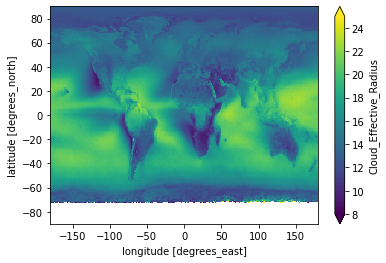

In [8]:
ds_prev['Cloud_Effective_Radius'].mean('time').plot(vmin=8, vmax=25)

In [9]:
ds_prev['year'] = np.floor(ds_prev['time']/1e4).astype(int)

ds_prev['time']

ds_prev['month'] = (np.floor((ds_prev['time']-ds_prev['year']*1e4)/100)).astype(int)

ds_prev['day'] = np.floor(ds_prev['time']-ds_prev['year']*1e4 - ds_prev['month']*100).astype(int)

In [10]:
df_date = ds_prev[['year','month','day']].to_dataframe()

df_date

df_date['date'] = df_date.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f} 12:00', axis=1)

df_date['date'] = pd.to_datetime(df_date['date'] )

df_date

,year,month,day,date
time,,,,
20040601.5,2004,6,1,2004-06-01 12:00:00
20040602.5,2004,6,2,2004-06-02 12:00:00
20040603.5,2004,6,3,2004-06-03 12:00:00
20040604.5,2004,6,4,2004-06-04 12:00:00
20040605.5,2004,6,5,2004-06-05 12:00:00
...,...,...,...,...
20180827.5,2018,8,27,2018-08-27 12:00:00
20180828.5,2018,8,28,2018-08-28 12:00:00
20180829.5,2018,8,29,2018-08-29 12:00:00


In [11]:
ds_prev['time'] = df_date['date']

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(


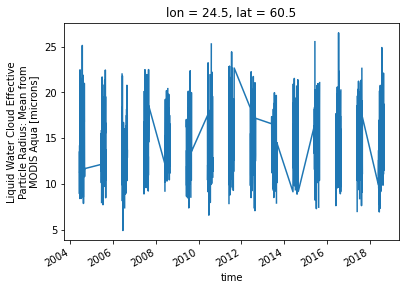

In [12]:
ds_prev['Cloud_Effective_Radius'].sel(lat=60, lon=24, method='nearest').plot()

In [13]:
ds_new['month'] = ds_new['time'].dt.month

In [14]:
is_summer = ds_new['month'].isin([6,7,8])

In [15]:
is_summer

<xarray.DataArray 'month' (time: 265)>
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])
Coordinates:
    band     int64 1
  * time     (time) datetime64[ns] 2012-01-01 2012-01-02 ... 2012-09-21

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


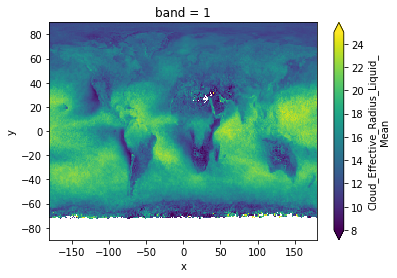

In [16]:
ds_new['Cloud_Effective_Radius_Liquid_Mean'].where(is_summer).mean('time').plot(vmin=8, vmax=25)

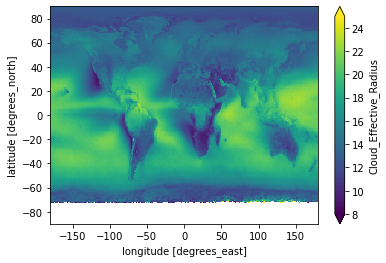

In [17]:
ds_prev['Cloud_Effective_Radius'].mean('time').plot(vmin=8, vmax=25)

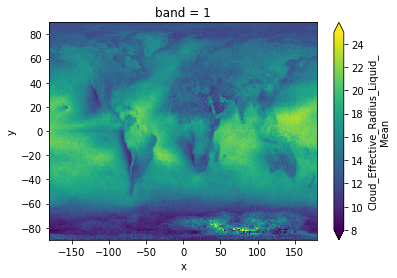

In [18]:
ds_new['Cloud_Effective_Radius_Liquid_Mean'].mean('time').plot(vmin=8, vmax=25)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecate

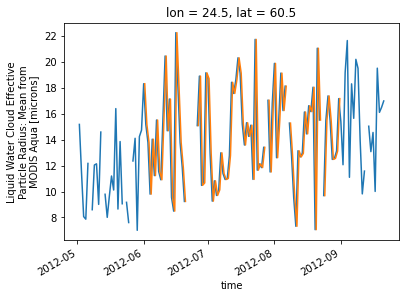

In [19]:
ds_new['Cloud_Effective_Radius_Liquid_Mean'].sel(time=slice('2012-05','2012-10')).sel(y=60, x=24, method='nearest').plot()
ds_prev['Cloud_Effective_Radius'].sel(time=slice('2012-05','2012-10')).sel(lat=60, lon=24, method='nearest').plot()

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecate

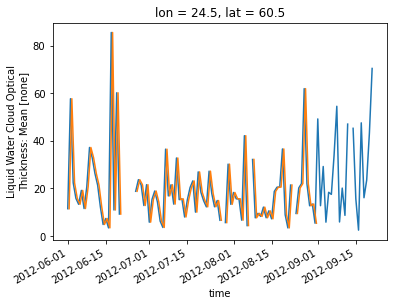

In [20]:
ds_new['Cloud_Optical_Thickness_Liquid_Mean'].sel(time=slice('2012-06','2012-09')).sel(y=60, x=24, method='nearest').plot()
ds_prev['Cloud_Optical_Thickness_Liquid_Mean'].sel(time=slice('2012-06','2012-09')).sel(lat=60, lon=24, method='nearest').plot()

In [21]:
ds_new['time'].sel(time=slice('2014','2019'))

<xarray.DataArray 'time' (time: 0)>
array([], dtype='datetime64[ns]')
Coordinates:
    band     int64 1
  * time     (time) datetime64[ns]

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(


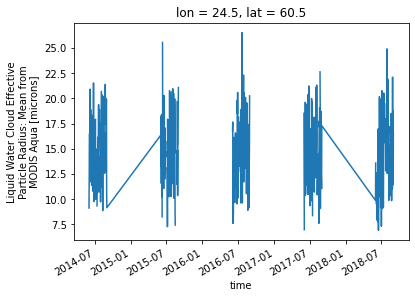

In [22]:
ds_prev['Cloud_Effective_Radius'].sel(time=slice('2014','2019')).sel(lat=60, lon=24, method='nearest').plot()

In [23]:
import pandas as pd

## Comparison to plotted data (source data with paper)

In [24]:
from bs_fdbck.constants import path_measurement_data

In [25]:
fn = path_measurement_data / 'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=4, header=1,)# usecols=range(7,12),nrows=7)

df_hyy_1.head()
#df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
#                            'T (degree C).1':'T (degree C)',
#                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
#                             'N100 (cm^-3).1':'N100 (cm^-3)'
#                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1

,year,month,day,LAT,LON,OA (microgram m^-3),CWP (g m^-2),CER (micrometer),COT
0,2012,7,5,60.5,22.5,3.218589,191,12.940000,26.219999
1,2012,7,10,60.5,22.5,4.714353,172,10.950000,24.430000
2,2012,7,14,60.5,22.5,1.451827,106,15.790000,12.030000
3,2012,7,19,60.5,22.5,3.101941,262,16.039999,28.650000
4,2012,7,22,60.5,22.5,0.875789,92,10.630000,14.820000
...,...,...,...,...,...,...,...,...,...
3668,2018,8,13,65.5,29.5,0.674785,191,15.200000,18.969999
3669,2018,8,14,65.5,29.5,1.356364,291,15.200000,31.449999
3670,2018,8,19,65.5,29.5,0.916047,139,18.230000,11.960000
3671,2018,8,20,65.5,29.5,1.325436,177,14.049999,19.869999


In [26]:
import pandas as pd

In [27]:
df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )

In [28]:
df_hyy_1 = df_hyy_1.set_index(['date','LAT','LON'])

In [29]:
df_hyy_1


,,,year,month,day,OA (microgram m^-3),CWP (g m^-2),CER (micrometer),COT
date,LAT,LON,,,,,,,
2012-07-05,60.5,22.5,2012,7,5,3.218589,191,12.940000,26.219999
2012-07-10,60.5,22.5,2012,7,10,4.714353,172,10.950000,24.430000
2012-07-14,60.5,22.5,2012,7,14,1.451827,106,15.790000,12.030000
2012-07-19,60.5,22.5,2012,7,19,3.101941,262,16.039999,28.650000
2012-07-22,60.5,22.5,2012,7,22,0.875789,92,10.630000,14.820000
...,...,...,...,...,...,...,...,...,...
2018-08-13,65.5,29.5,2018,8,13,0.674785,191,15.200000,18.969999
2018-08-14,65.5,29.5,2018,8,14,1.356364,291,15.200000,31.449999
2018-08-19,65.5,29.5,2018,8,19,0.916047,139,18.230000,11.960000


In [30]:
ds_hyy = df_hyy_1.to_xarray()

In [32]:

ds_prev['time'] = pd.to_datetime(ds_prev[['year','month','day']].to_dataframe().apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1))


In [33]:
ds_prev

<xarray.Dataset>
Dimensions:                                              (time: 1380, lon: 360, lat: 180)
Coordinates:
  * time                                                 (time) datetime64[ns] ...
  * lon                                                  (lon) float64 -179.5...
  * lat                                                  (lat) float64 -89.5 ...
Data variables: (12/47)
    AOD_QA_weighted_470                                  (time, lat, lon) float64 ...
    AOD_QA_weighted_550                                  (time, lat, lon) float64 ...
    AOD_QA_weighted_660                                  (time, lat, lon) float64 ...
    AOD_470                                              (time, lat, lon) float64 ...
    AOD_550                                              (time, lat, lon) float64 ...
    AOD_660                                              (time, lat, lon) float64 ...
    ...                                                   ...
    t_700hp                                              (time, lat, lon) float64 ...
    r_700hp                                              (time, lat, lon) float64 ...
    LTS                                                  (time, lat, lon) float64 ...
    year                                                 (time) int64 2004 .....
    month                                                (time) int64 6 6 ... 8
    day                                                  (time) int64 1 2 ... 31
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Jul 01 09:06:19 2022: cdo selname,AOD_QA_weighted_470,A...
    Institution:  Finnish Meteorological Institute
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [34]:
ds_prev_mas = ds_prev.sel(time = ds_hyy['date'].values)

In [35]:
ds_prev_mas

<xarray.Dataset>
Dimensions:                                              (time: 173, lon: 360, lat: 180)
Coordinates:
  * time                                                 (time) datetime64[ns] ...
  * lon                                                  (lon) float64 -179.5...
  * lat                                                  (lat) float64 -89.5 ...
Data variables: (12/47)
    AOD_QA_weighted_470                                  (time, lat, lon) float64 ...
    AOD_QA_weighted_550                                  (time, lat, lon) float64 ...
    AOD_QA_weighted_660                                  (time, lat, lon) float64 ...
    AOD_470                                              (time, lat, lon) float64 ...
    AOD_550                                              (time, lat, lon) float64 ...
    AOD_660                                              (time, lat, lon) float64 ...
    ...                                                   ...
    t_700hp                                              (time, lat, lon) float64 ...
    r_700hp                                              (time, lat, lon) float64 ...
    LTS                                                  (time, lat, lon) float64 ...
    year                                                 (time) int64 2012 .....
    month                                                (time) int64 7 7 ... 8
    day                                                  (time) int64 5 7 ... 30
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Jul 01 09:06:19 2022: cdo selname,AOD_QA_weighted_470,A...
    Institution:  Finnish Meteorological Institute
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [36]:
 df_hyy_1.reset_index()['LAT']

0       60.5
1       60.5
2       60.5
3       60.5
4       60.5
        ... 
3668    65.5
3669    65.5
3670    65.5
3671    65.5
3672    65.5
Name: LAT, Length: 3673, dtype: float64

In [37]:
la = df_hyy_1.reset_index()['LAT']
lo = df_hyy_1.reset_index()['LON']

In [38]:
(la== 60.5) & (lo == 22.5)

0        True
1        True
2        True
3        True
4        True
        ...  
3668    False
3669    False
3670    False
3671    False
3672    False
Length: 3673, dtype: bool

In [39]:
import matplotlib.pyplot as plt

In [41]:
a = ds_hyy['COT'].sel(date=slice('2012-06','2018-09')).sel(LAT=60, LON=20, method='nearest')#.plot()

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(


In [64]:
_ds_prev = ds_prev_mas.sel(time=slice('2012-06','2013-09')).sel(lat=60, lon=22., method='nearest')#.plot(alpha=.2)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(


In [84]:
_ds_prev =_ds_prev.where(_ds_prev['Cloud_Top_Temperature_Day_Mean']>(-15+273.15), drop=False)
_ds_prev =_ds_prev.where(_ds_prev['Cloud_Effective_Radius']>5, drop=False)
_ds_prev =_ds_prev.where(_ds_prev['Cloud']>5, drop=False)
_ds_prev =_ds_prev.where(_ds_prev['Cloud_Optical_Thickness_Combined_Mean']>5, drop=False)
_ds_prev =_ds_prev.where(_ds_prev['Cloud_Optical_Thickness_Combined_Mean']<50, drop=False)

In [85]:
b = _ds_prev['Cloud_Optical_Thickness_Liquid_Mean']#.sel(time=slice('2012-06','2018-09')).sel(lat=60, lon=22., method='nearest')#.plot(alpha=.2)

## Difference likely due to high OA versus low OA

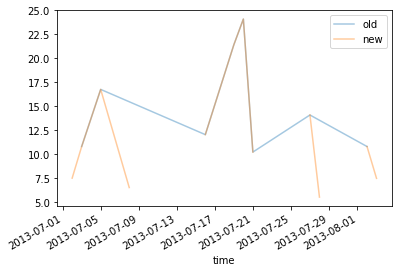

In [86]:
c = df_hyy_1.reset_index()[((la== 60.5) & (lo == 22.5))].set_index('date')['COT']#.plot()
c.loc['2013':'2013'].plot(label='old', alpha=.4)
b.to_dataframe()['Cloud_Optical_Thickness_Liquid_Mean'].loc['2013':'2013'].plot(alpha=.4, label='new')

plt.legend()


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecate

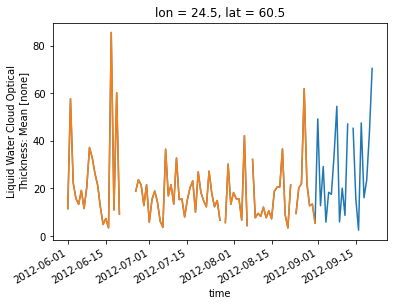

In [88]:
ds_new['Cloud_Optical_Thickness_Liquid_Mean'].sel(time=slice('2012-06','2012-09')).sel(y=60, x=24, method='nearest').plot()
ds_prev['Cloud_Optical_Thickness_Liquid_Mean'].sel(time=slice('2012-06','2012-09')).sel(lat=60, lon=24, method='nearest').plot()